<a href="https://colab.research.google.com/github/prachi735/EVA5/blob/main/Session7/EVA5_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import files from github

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd EVA5
! git clone https://github.com/prachi735/EVA5
%cd EVA5
!git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/EVA5
fatal: destination path 'EVA5' already exists and is not an empty directory.
/content/EVA5/EVA5
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/prachi735/EVA5
   2f879f4..a85f3bc  main       -> origin/main
Updating 2f879f4..a85f3bc
Fast-forward
 Session7/model.py | 6 +++---
 1 file changed, 3 insertions(+), 3 deletions(-)


In [2]:
from Session7.dataset import *
from Session7.utils import *
from Session7.model import *
from Session7.test import *
from Session7.train import *

from torchsummary import summary


%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
dataset_name = 'CIFAR10'
in_channels = 3
#dataset_name = 'MNIST'
#in_channels = 1

In [4]:
temp_train, _ = get_dataset(dataset_name)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
data_stats = get_data_stats(torch.tensor(temp_train.data))
print(data_stats['mean'],data_stats['std'])

tensor(120.7076) tensor(64.1501)


In [6]:
train_transforms,test_transforms = get_transforms(data_stats['mean'],data_stats['std'])

In [7]:
train_data, test_data = get_dataset(dataset_name,train_transforms,test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
device = get_device()
device

CUDA Available? True


device(type='cuda')

In [9]:
# dataloader arguments
dataloader_args = dict(shuffle = True, batch_size = 128, num_workers = 4,pin_memory = True) if device.type == 'cuda' else dict(shuffle = True, batch_size = 64)
train_dataloader,test_dataloader = get_dataloader(train_data, test_data, **dataloader_args)

torch.Size([128, 3, 32, 32])
torch.Size([128])


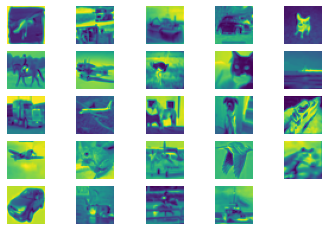

In [10]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 24
for index in range(1, num_of_images + 1):
    plt.subplot(5, 5, index)
    plt.axis('off')
    plt.imshow(images[index][0])

In [11]:
# get model summary 
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=32,n2=64,n3=256,n4=512).to(device)
print(summary(model, input_size=(3,32,32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
    GhostBatchNorm-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,216
              ReLU-5           [-1, 32, 32, 32]               0
    GhostBatchNorm-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,432
              ReLU-9           [-1, 64, 16, 16]               0
   GhostBatchNorm-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,864
             ReLU-12           [-1, 64, 16, 16]               0
   GhostBatchNorm-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6

In [13]:
EPOCHS=2
is_L1_loss = 0
is_GBN = True
gbn_splits = 4
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=16,n2=32,n3=128,n4=256,grp=64).to(device)
optimizer = get_optimizer(model.parameters(),"L2")

In [14]:
train_losses = []
train_acc = []
test_losses = []
test_acc = []

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_dataloader, optimizer, epoch,train_losses, train_acc, is_L1_loss, lamda_l1=0.0001)
    test(model, device, test_dataloader, test_losses, test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.9240624904632568 Batch_id=390 Accuracy=24.97: 100%|██████████| 391/391 [00:12<00:00, 30.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 8.2737, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Loss=1.7914934158325195 Batch_id=390 Accuracy=34.67: 100%|██████████| 391/391 [00:13<00:00, 30.06it/s]



Test set: Average loss: 12.6724, Accuracy: 1000/10000 (10.00%)



In [15]:
model_path = 'session7_model.pth'
torch.save(model.state_dict(), model_path) 

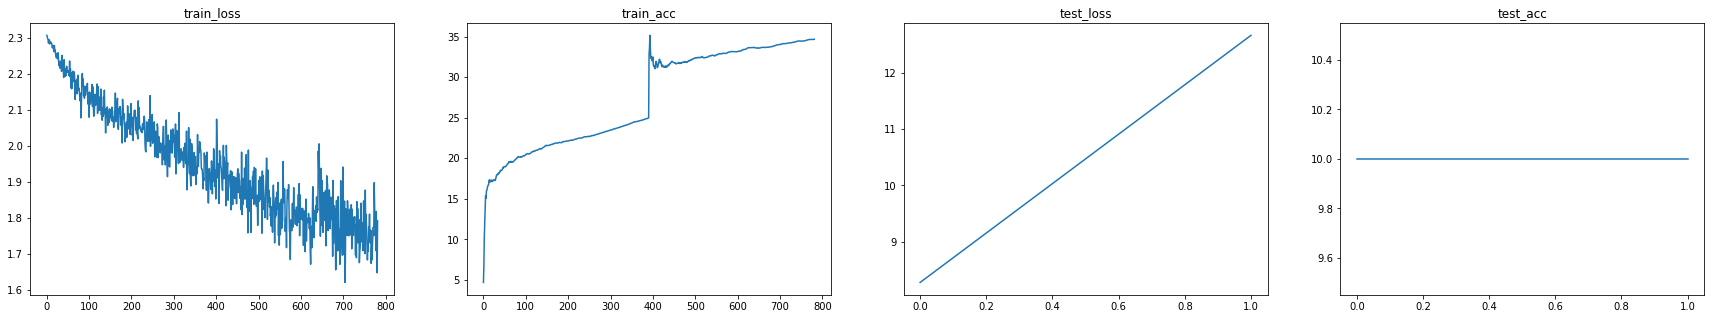

In [16]:
plot_results(train_losses,train_acc,test_losses,test_acc)

In [21]:
model = Net(is_GBN=True, gbn_splits=2, in_c = in_channels,n1=16,n2=32,n3=128,n4=256,grp=64)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [22]:
test_images,target_labels,target_predictions = get_misclassified_images(model, test_dataloader)

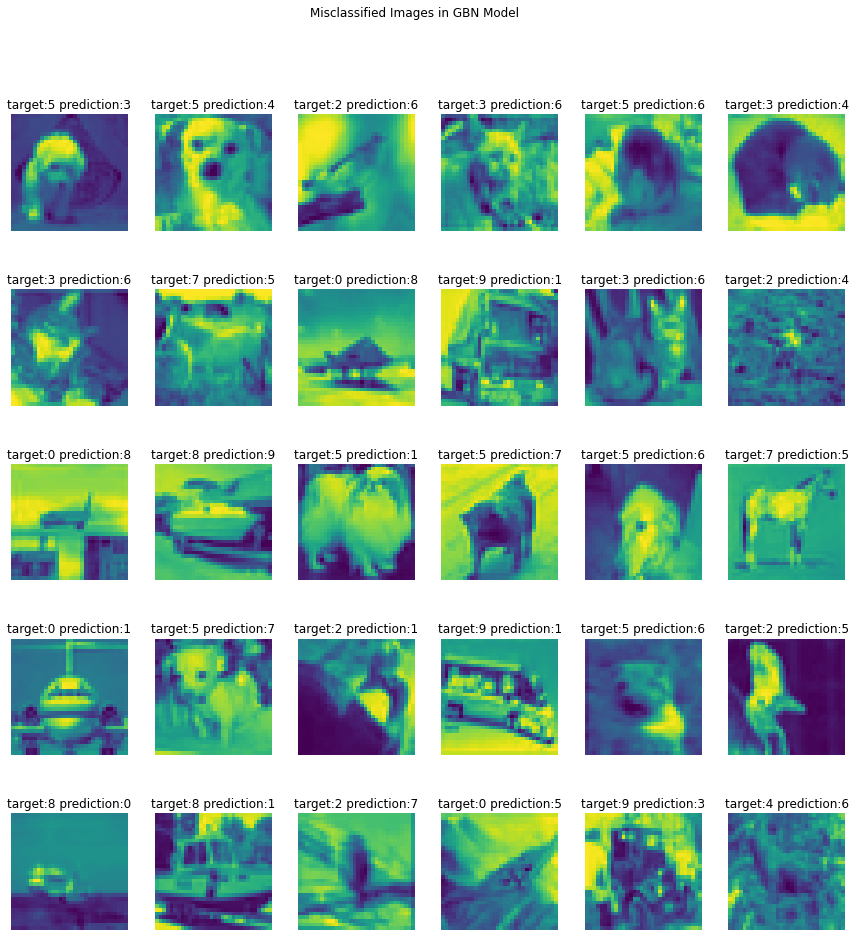

In [23]:
show_misclassified_images(test_images,target_labels,target_predictions,nrow=5, ncol=6)